# <center>Data Pre-Processing</center>

## 0. Importing Libraries

In [1]:
!python --version

import warnings
warnings.filterwarnings('ignore')

Python 3.11.5


In [2]:
import cv2     
import math   
import matplotlib.pyplot as plt    
import pandas as pd
import numpy as np 
from os import path
from os import listdir
from os.path import exists
import os, stat

from PIL import Image as img

%matplotlib inline

ModuleNotFoundError: No module named 'cv2'

## 1. Loading and combining play datasets

In [4]:
videos_csv = pd.read_csv('./play_data/Video.csv',sep=';')
plays_csv = pd.read_csv('./play_data/Play.csv',sep=';')
training_labels = pd.merge(plays_csv.iloc[:,[0,1,2,3,4,5,9,10]], videos_csv[['VideoFileName','VideoPath','PlayID','GameID']],left_on='ID', right_on='PlayID')
training_labels = training_labels[training_labels.Type.isin(['K', 'R', 'P', 'X', 'F', 'U'])]
training_labels.head()

ID  Down  ToGo Spot                                               Text  \
0  11   2.0     3  H24  2nd & 3 at OSU24: Saine, Brandon rush for 11 y...   
1  11   2.0     3  H24  2nd & 3 at OSU24: Saine, Brandon rush for 11 y...   
2  15   1.0     0  H03  1st & GOAL at OSU03: Pettrey, Aaron kick attem...   
3  18   1.0    10  H26  1st & 10 at OSU26: Masoli, J. pass complete to...   
4  38   1.0    10  H09  1st & 10 at OSU09: James, L. rush for loss of ...   

   Quarter HasBall Type VideoFileName    VideoPath  PlayID  GameID  
0        1       V    R           000  2009/G3/Q1/      11       3  
1        1       V    R           003  2009/G3/Q1/      11       3  
2        1       V    X           002  2009/G3/Q1/      15       3  
3        1       H    P           012  2009/G4/Q1/      18       4  
4        1       H    R           027  2009/G4/Q1/      38       4

## 2 Splitting videos into static frames

In [4]:
label_dict = {}
for index, row in training_labels.iterrows():
    video_path = './videos_high_resolution/' + row[9] + 'raw/' + row[8] + '.mp4'
    label = row[7]
    if index % 1000 == 0 or index == (len(training_labels) - 1):
        print("Video " + str(index + 1) + " of " + str(len(training_labels)))
    if path.exists(video_path):
        cap = cv2.VideoCapture(video_path)
        frameRate = cap.get(cv2.CAP_PROP_FPS)
        x = 1
        count = 0
        while(cap.isOpened()):
            frameId = cap.get(cv2.CAP_PROP_POS_FRAMES)
            ret, frame = cap.read()
            if (ret != True):
                break
            if (frameId % math.floor(frameRate) == 0) or (frameId % math.floor(frameRate) == (math.floor(frameRate) // 2)):
                filename ="./stadium-iopt/training_frames/rgb" + str(row[-1]) + "_" + str(row[5]) + "_" + row[8] + "_" + "frame%d.jpg" % count
                count+=1
                h, w, c = frame.shape
                y = (w-h)//2
                good = frame[:, y:y+h]
                good = cv2.resize(good,(224,224))
                cv2.imwrite(filename, good)
#                 os.chmod(filename, stat.S_IRWXG) # giving read write permissions to group for frames
                label_dict[filename] = [str(row[-1]) + "_" + str(row[5]) + "_" + row[8], count, label]
        cap.release()

Video 1 of 6370
Video 1001 of 6370
Video 2001 of 6370
Video 3001 of 6370


[mpeg4 @ 0x21a0d40] P cbpy damaged at 20 8
[mpeg4 @ 0x21a0d40] Error at MB: 348
[h264 @ 0x315fc40] Invalid NAL unit size (-366147673 > 110863).
[h264 @ 0x315fc40] Error splitting the input into NAL units.
[h264 @ 0x3208dc0] P sub_mb_type 8 out of range at 22 27
[h264 @ 0x3208dc0] error while decoding MB 22 27
[h264 @ 0x3276fc0] co located POCs unavailable
[h264 @ 0x32a4800] corrupted macroblock 7 27 (total_coeff=-1)
[h264 @ 0x32a4800] error while decoding MB 7 27


Video 4001 of 6370


[h264 @ 0x2da3c40] negative number of zero coeffs at 8 32
[h264 @ 0x2da3c40] error while decoding MB 8 32


Video 5001 of 6370
Video 6001 of 6370


[h264 @ 0x291fbc0] negative number of zero coeffs at 17 9
[h264 @ 0x291fbc0] error while decoding MB 17 9
[h264 @ 0x2ca2c80] cbp too large (307) at 31 14
[h264 @ 0x2ca2c80] error while decoding MB 31 14
[h264 @ 0x1f80b00] Invalid NAL unit size (-544493277 > 8168).
[h264 @ 0x1f80b00] Error splitting the input into NAL units.
[h264 @ 0x21aed40] mb_type 51 in P slice too large at 37 29
[h264 @ 0x21aed40] error while decoding MB 37 29


Video 6370 of 6370


In [5]:
label_dict

{'./stadium-iopt/training_frames/rgb264_1_000_frame0.jpg': ['264_1_000',
  1,
  'K'],
 './stadium-iopt/training_frames/rgb264_1_000_frame1.jpg': ['264_1_000',
  2,
  'K'],
 './stadium-iopt/training_frames/rgb264_1_000_frame2.jpg': ['264_1_000',
  3,
  'K'],
 './stadium-iopt/training_frames/rgb264_1_000_frame3.jpg': ['264_1_000',
  4,
  'K'],
 './stadium-iopt/training_frames/rgb264_1_000_frame4.jpg': ['264_1_000',
  5,
  'K'],
 './stadium-iopt/training_frames/rgb264_1_000_frame5.jpg': ['264_1_000',
  6,
  'K'],
 './stadium-iopt/training_frames/rgb264_1_000_frame6.jpg': ['264_1_000',
  7,
  'K'],
 './stadium-iopt/training_frames/rgb264_1_000_frame7.jpg': ['264_1_000',
  8,
  'K'],
 './stadium-iopt/training_frames/rgb264_1_000_frame8.jpg': ['264_1_000',
  9,
  'K'],
 './stadium-iopt/training_frames/rgb264_1_000_frame9.jpg': ['264_1_000',
  10,
  'K'],
 './stadium-iopt/training_frames/rgb264_1_000_frame10.jpg': ['264_1_000',
  11,
  'K'],
 './stadium-iopt/training_frames/rgb264_1_000_frame

In [6]:
def extract_frames(row, fps=10, mode='rgb'):
    video_path = '../data/videos_high_resolution/' + row[9] + 'raw/' + row[8] + '.mp4'
    label = row[7]
    if path.exists(video_path):
        cap = cv2.VideoCapture(video_path)
        frameRate = cap.get(cv2.CAP_PROP_FPS)
        x = 1
        count = 0
        while(cap.isOpened()):
            frameId = cap.get(cv2.CAP_PROP_POS_FRAMES)
            ret, frame = cap.read()
            if (ret != True):
                break
            if ((frameId % (math.ceil(frameRate) // fps)) == 0):
                filename = "./stadium-iopt/training_frames/" + mode + "/" + str(row[-1]) + "_" + str(row[5]) + "_" + row[8] + "_" + "frame%d.jpg" % count
                count+=1
                h, w, c = frame.shape
                y = (w-h)//2
                good = frame[:, y:y+h]
                good = cv2.resize(good,(224,224))
                if mode == 'grayscale':
                    good = cv2.cvtColor(good,cv2.COLOR_BGR2GRAY)
                cv2.imwrite(filename, good)
                label_dict[filename] = [str(row[-1]) + "_" + str(row[5]) + "_" + row[8], count, label]
        cap.release()
    return row

In [7]:
mode = 'rgb'
rgb_dir = "./stadium-iopt/training_frames/"

file_count = len([name for name in listdir(rgb_dir) if not name.startswith(".")])

if file_count == 0:
    training_labels.apply(lambda row: extract_frames(row,
                                                     label_dict,
                                                     sample_dist,
                                                     current_counts,
                                                     unique_plays,
                                                     10,
                                                     'rgb'), axis=1)

In [8]:
file_count

133755

## 3. Saving the training frames' labels

In [9]:
mode = 'rgb'

In [10]:
label_map = {
    'K': 0,
    'R': 1,
    'P': 2,
    'X': 3,
    'F': 4,
    'U': 5,
}
file_path = "./stadium-iopt/training_labels/" + mode + "/" + "labels.csv"

if not exists(file_path):
    labels_df = pd.DataFrame.from_dict(label_dict, orient='index').reset_index()
    labels_df.columns = ['filename','play','frame','label']
    labels_df['filename'] = labels_df['filename'].apply(lambda x: x.split('/')[-1])
    labels_df['numeric_label'] = labels_df['label'].map(label_map)
    labels_df.to_csv(file_path, index=False)
else:
    labels_df = pd.read_csv(file_path)
labels_df.head()

filename       play  frame label  numeric_label
0  rgb264_1_000_frame0.jpg  264_1_000      1     K              0
1  rgb264_1_000_frame1.jpg  264_1_000      2     K              0
2  rgb264_1_000_frame2.jpg  264_1_000      3     K              0
3  rgb264_1_000_frame3.jpg  264_1_000      4     K              0
4  rgb264_1_000_frame4.jpg  264_1_000      5     K              0

In [11]:

labels_df = pd.read_csv("./stadium-iopt/training_labels/" + mode + "/" + "labels.csv")
labels_df

filename        play  frame label  numeric_label
0         rgb264_1_000_frame0.jpg   264_1_000      1     K              0
1         rgb264_1_000_frame1.jpg   264_1_000      2     K              0
2         rgb264_1_000_frame2.jpg   264_1_000      3     K              0
3         rgb264_1_000_frame3.jpg   264_1_000      4     K              0
4         rgb264_1_000_frame4.jpg   264_1_000      5     K              0
...                           ...         ...    ...   ...            ...
133745  rgb6017_4_039_frame16.jpg  6017_4_039     17     P              2
133746  rgb6017_4_039_frame17.jpg  6017_4_039     18     P              2
133747  rgb6017_4_039_frame18.jpg  6017_4_039     19     P              2
133748  rgb6017_4_039_frame19.jpg  6017_4_039     20     P              2
133749  rgb6017_4_039_frame20.jpg  6017_4_039     21     P              2

[133750 rows x 5 columns]

## 4. Creating a numpy array with all the frames for each play

In [12]:
path = "./stadium-iopt/training_frames/"
images =  [[]]
prev_play = labels_df.play[0]
play_idx = 0
plays = [labels_df.iloc[0].play]
labels = [labels_df.iloc[0].numeric_label]
char_labels = [labels_df.iloc[0].label]

for idx, row in labels_df.iterrows():  
    image = img.open(path + row.filename)
    if prev_play != row.play:
        images[play_idx] = np.asarray(images[play_idx])
        play_idx += 1
        prev_play = row.play
        images.append([])
        labels.append(row.numeric_label)
        char_labels.append(row.label)
        plays.append(row.play)
        if play_idx % 1000 == 0 or play_idx == (5667 - 1):
            print("Video " + str(play_idx + 1) + " of " + str(5667))
    images[play_idx].append(np.asarray(image))
#     os.chmod(path + row.filename, stat.S_IRWXG) # giving read write permissions to group for frames
    
    
images[-1] = np.asarray(images[-1])    
images = np.asarray(images)

Video 1001 of 5667
Video 2001 of 5667
Video 3001 of 5667
Video 4001 of 5667
Video 5001 of 5667


In [13]:
print(images.shape)
print(images[0].shape)
print(images[0][0].shape)

(5647,)
(32, 224, 224, 3)
(224, 224, 3)


In [14]:
print(len(labels))
print(len(char_labels))
print(len(plays))

5647
5647
5647


In [17]:
# Saving the numeric labels

np.save('./stadium-iopt/numpy_data/numeric_labels.npy', labels)

# Saving the char labels

np.save('./stadium-iopt/numpy_data/char_labels.npy', char_labels)

# Saving the play numbers

np.save('./stadium-iopt/numpy_data/plays.npy', plays)

In [16]:
# Saving the numpy array containing all the frames for each play

np.save('./stadium-iopt/numpy_data/images.npy', images)

## 5. Converting the training labels to one-hot vectors

In [18]:
one_hot_labels = np.zeros((len(labels),len(labels_df.numeric_label.unique())))
idx = 0

for label in labels:
    one_hot_labels[idx][label] = 1
    idx += 1
    
one_hot_labels = np.asarray(one_hot_labels)

In [19]:
# Saving the numpy array containing all the labels as one-hot encoded vectors

np.save('./stadium-iopt/numpy_data/one_hot_labels.npy', one_hot_labels)

## 6. Creating a smaller training data set with randomly sampled plays

In [ ]:
# Random Indexes
indexes = np.random.choice(len(images), size=(len(images) // 5), replace=False)

# Images Array
samples_images = images[indexes]

# One-hot Labels
samples_labels = one_hot_labels[indexes]

display(samples_images.shape)
display(samples_labels.shape)

In [ ]:
# Saving the numpy arrays containing samples of the images and labels

np.save('./stadium-iopt/numpy_data/sample_indexes.npy', indexes)
np.save('./stadium-iopt/numpy_data/sample_images.npy', samples_images)
np.save('./stadium-iopt/numpy_data/sample_one_hot_labels.npy', samples_labels)

In [ ]:
labels = np.load('./stadium-iopt/numpy_data/sample_images.npy', allow_pickle=True)
labels

## 7. Plotting all the training frames for a play

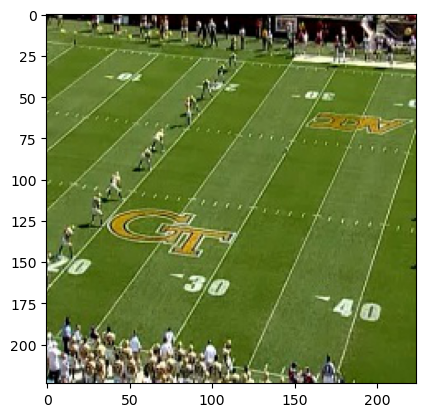

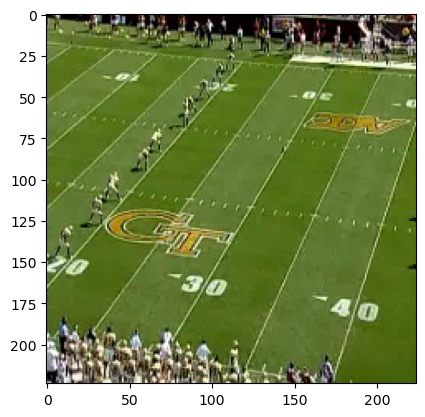

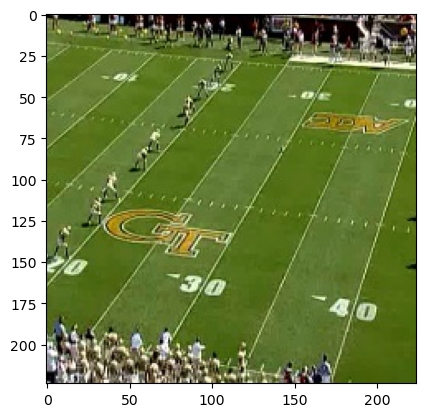

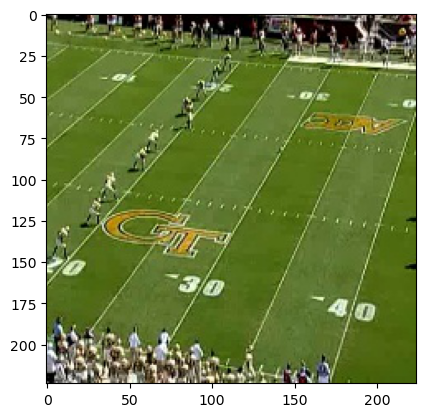

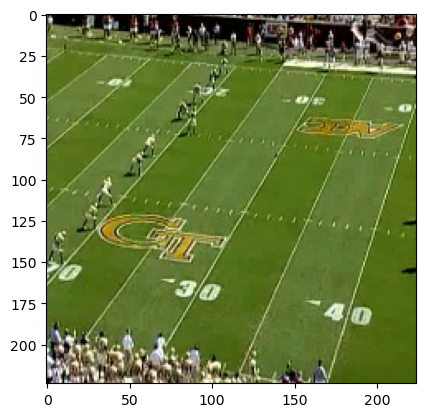

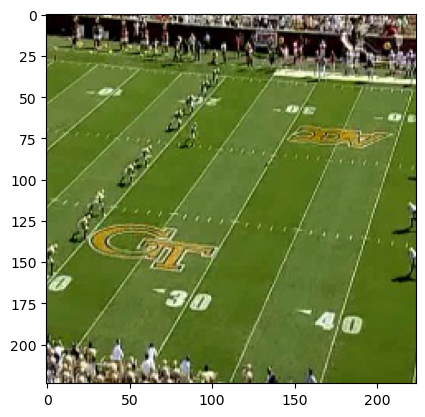

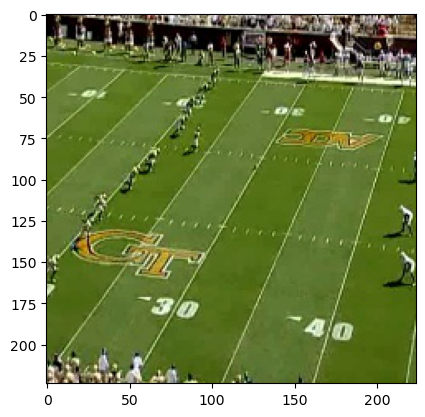

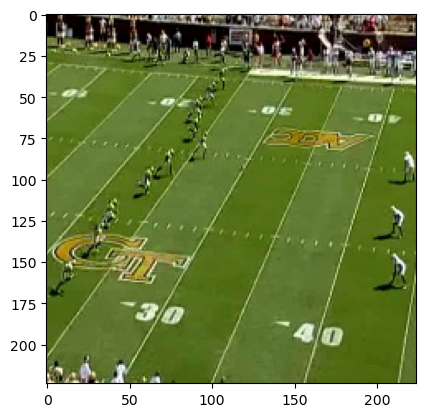

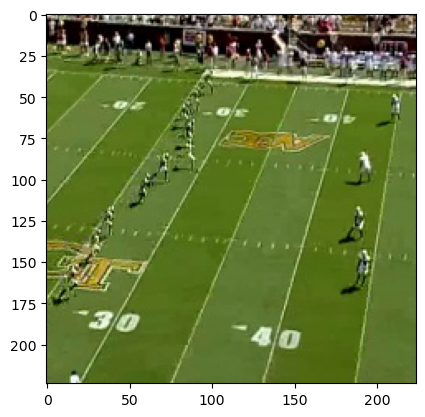

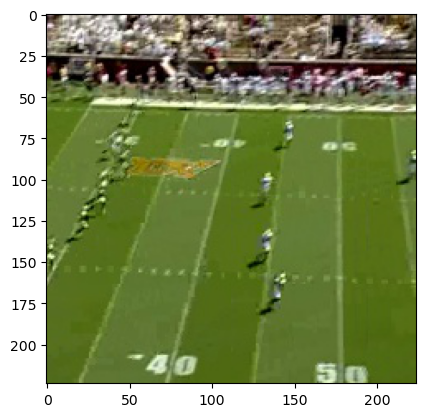

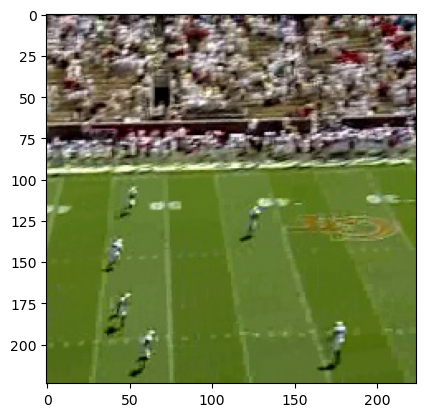

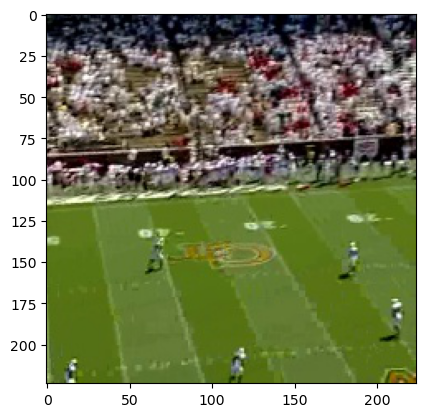

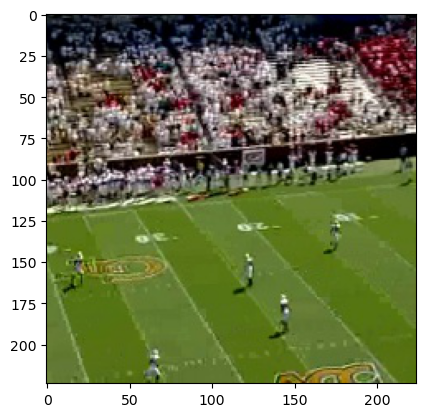

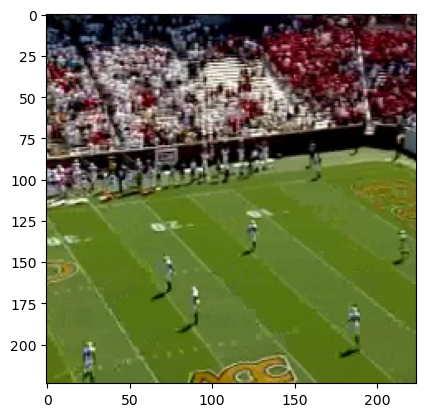

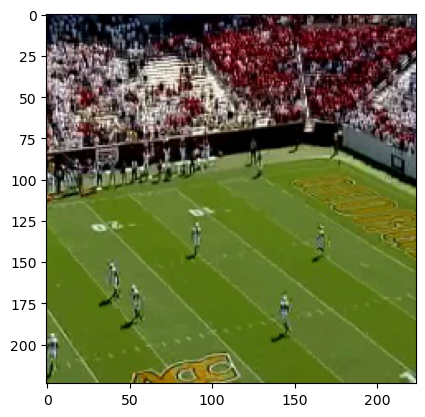

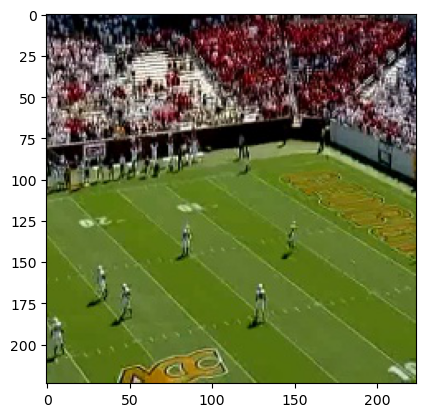

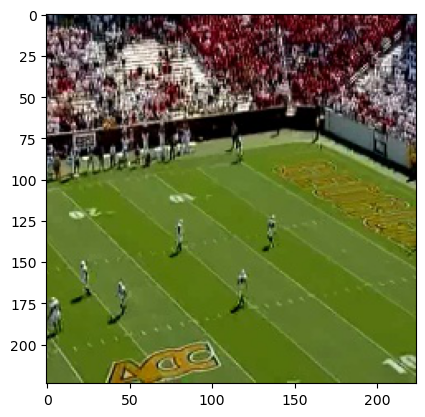

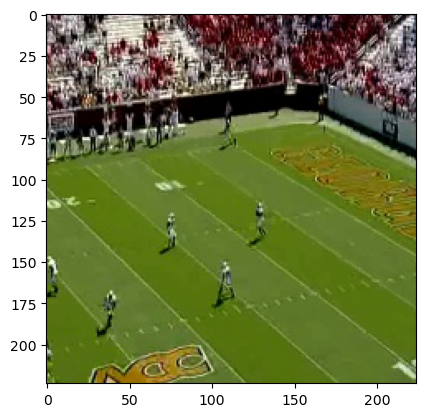

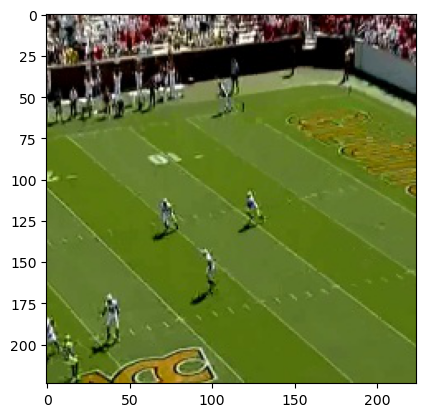

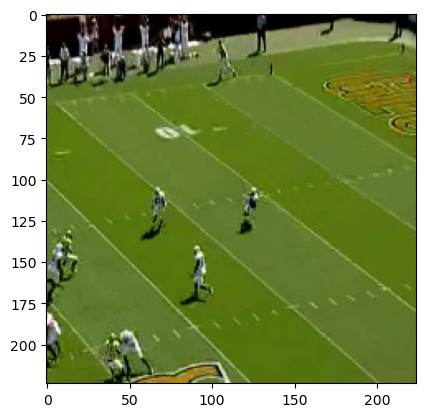

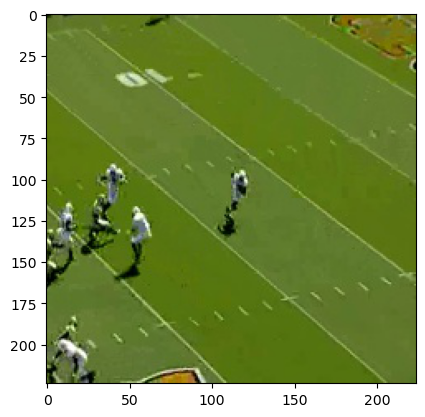

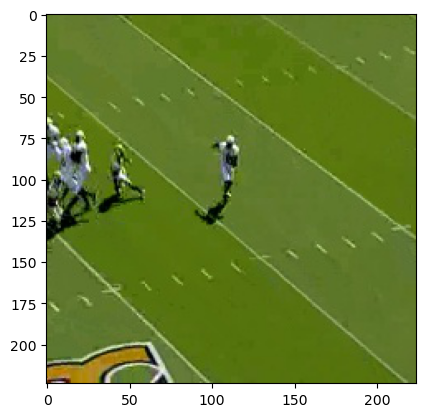

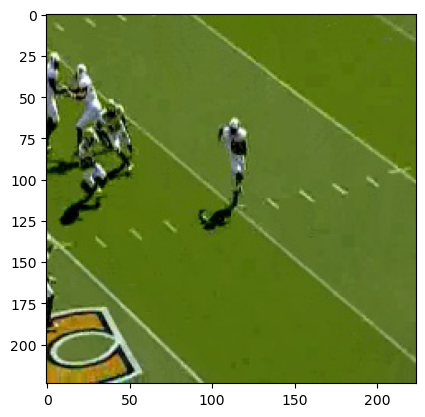

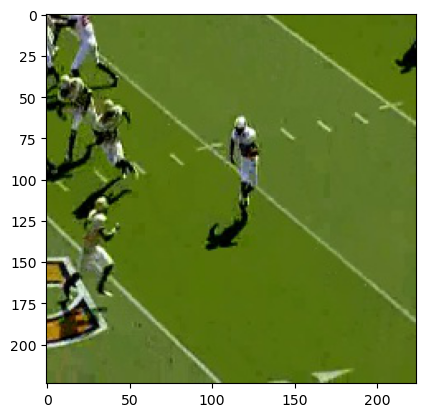

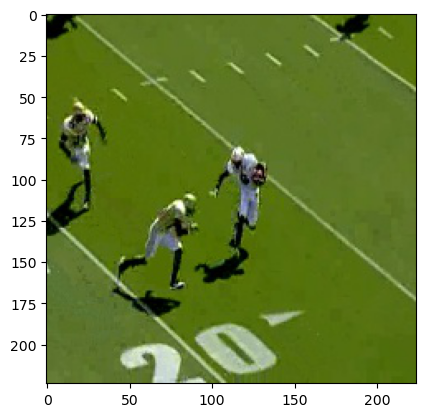

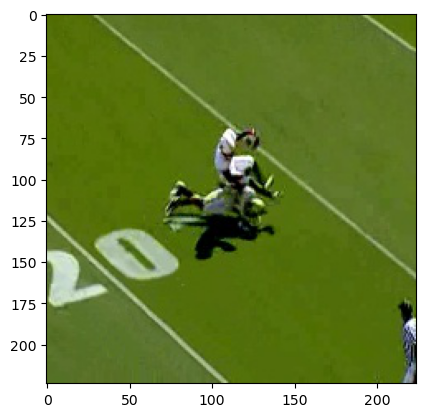

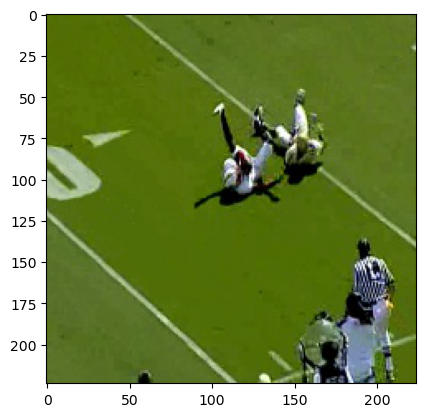

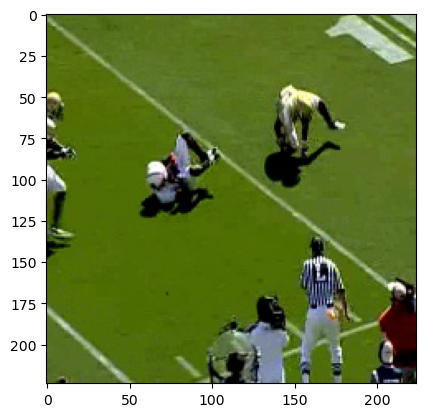

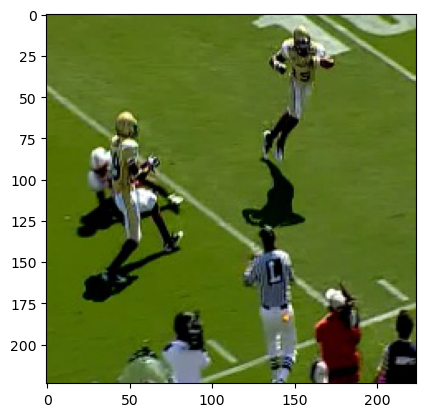

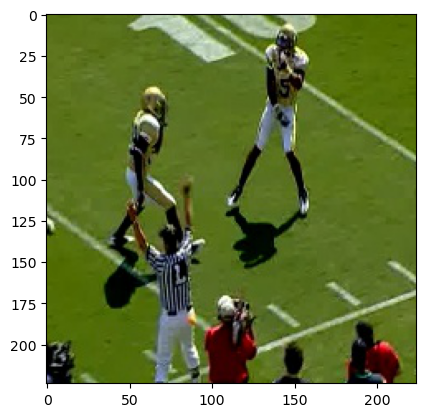

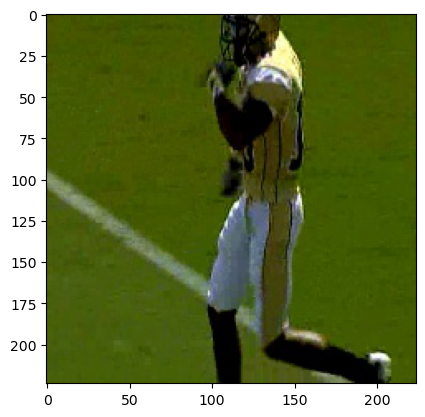

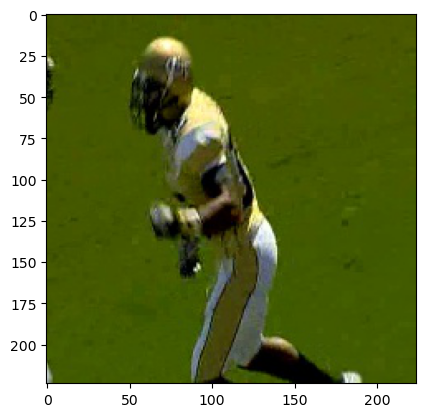

In [20]:
for i in range(len(images[0])):
    plt.figure()
    plt.imshow(images[0][i])